# Классификация

Так как в задании не предоставлена разметка данных, при решении реальной задачи ее необходимо запросить у заказчика.

В этом проекте мы проводим классификацию исходя из гипотезы, что заказчик предоставил нам корректные данные по номерам ОКПД

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_nlp = pd.read_csv(r'df_nlp.csv')

In [4]:
df_nlp

,OBJECT_NAME,OKPD_NUM,CLEAN_OBJECT_NAME,STEM_OBJECT_NAME
0,Поставка металлической мебели,31.0,поставка металлической мебели,"['поставк', 'металлическ', 'мебел']"
1,поставка офисных кресел,31.0,поставка офисных кресел,"['поставк', 'офисн', 'кресел']"
2,прочая закупка услуг (услуги по монтажу и пуск...,43.2,прочая закупка услуг услуги по монтажу и пуск...,"['проч', 'закупк', 'услуг', 'услуг', 'монтаж',..."
3,прочая закупка товара (стулья ученические),31.0,прочая закупка товара стулья ученические,"['проч', 'закупк', 'товар', 'стул', 'ученическ']"
4,выполнение работ по текущему ремонту заполнени...,43.3,выполнение работ по текущему ремонту заполнени...,"['выполнен', 'работ', 'текущ', 'ремонт', 'запо..."
...,...,...,...,...
896521,Поставка хозяйственных товаров для нужд ГБДОУ ...,13.9,поставка хозяйственных товаров для нужд гбдоу ...,"['поставк', 'хозяйствен', 'товар', 'нужд', 'гб..."
896522,Поставка сантехники для ГБДОУ детского сада № ...,23.4,поставка сантехники для гбдоу детского сада ...,"['поставк', 'сантехник', 'гбдо', 'детск', 'сад..."
896523,Поставка мебели для пищеблока в ГБДОУ детский ...,25.9,поставка мебели для пищеблока в гбдоу детский ...,"['поставк', 'мебел', 'пищеблок', 'гбдо', 'детс..."
896524,Поставка мебели для пищеблока в ГБДОУ детский ...,31.0,поставка мебели для пищеблока в гбдоу детский ...,"['поставк', 'мебел', 'пищеблок', 'гбдо', 'детс..."


In [5]:
df_nlp.dtypes

OBJECT_NAME           object
OKPD_NUM             float64
CLEAN_OBJECT_NAME     object
STEM_OBJECT_NAME      object
dtype: object

In [6]:
df_nlp['OKPD_NUM']  = df_nlp['OKPD_NUM'].astype('string')

In [7]:
def get_group(value):    
    if value in ('41.2', '43.1', '43.3', '43.9'):  
        return 'Строительно-монтажные работы'
    elif value in ('41.1', '71.1'):  
        return 'Проектно-изыскательские работы'
    elif value in ('43.2', '42.2'):  
        return 'Подключение коммуникаций'
    else:
        return 'Прочие'

In [8]:
df_nlp['GROUP'] = df_nlp['OKPD_NUM'].apply(lambda x: get_group(x))
df_nlp.head()

,OBJECT_NAME,OKPD_NUM,CLEAN_OBJECT_NAME,STEM_OBJECT_NAME,GROUP
0,Поставка металлической мебели,31.0,поставка металлической мебели,"['поставк', 'металлическ', 'мебел']",Прочие
1,поставка офисных кресел,31.0,поставка офисных кресел,"['поставк', 'офисн', 'кресел']",Прочие
2,прочая закупка услуг (услуги по монтажу и пуск...,43.2,прочая закупка услуг услуги по монтажу и пуск...,"['проч', 'закупк', 'услуг', 'услуг', 'монтаж',...",Подключение коммуникаций
3,прочая закупка товара (стулья ученические),31.0,прочая закупка товара стулья ученические,"['проч', 'закупк', 'товар', 'стул', 'ученическ']",Прочие
4,выполнение работ по текущему ремонту заполнени...,43.3,выполнение работ по текущему ремонту заполнени...,"['выполнен', 'работ', 'текущ', 'ремонт', 'запо...",Строительно-монтажные работы


### Подготовка обучающего и тестового набора данных

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_nlp ['STEM_OBJECT_NAME'], df_nlp ['GROUP'], test_size=0.25, random_state=42)

### Импорт необходимых библиотек scikit-learn

In [10]:
from sklearn.pipeline import Pipeline
# pipeline позволяет объединить в один блок трансформер и модель, что упрощает написание кода и улучшает его читаемость
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer преобразует тексты в числовые вектора, отражающие важность использования каждого слова из некоторого набора слов (количество слов набора определяет размерность вектора) в каждом тексте
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# набор метрик для оценки качества модели
from sklearn.model_selection import GridSearchCV
# модуль поиска по сетке параметров

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Логистическая регрессия 

In [12]:
logreg_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logreg_clf', LogisticRegression())])

In [13]:
logreg_ppl_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('logreg_clf', LogisticRegression())])

In [14]:
predicted_logreg_ppl = logreg_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_logreg_ppl, y_test))

                                precision    recall  f1-score   support

      Подключение коммуникаций       0.83      0.87      0.85     35179
Проектно-изыскательские работы       0.94      0.96      0.95     21350
                        Прочие       0.96      0.94      0.95    106499
  Строительно-монтажные работы       0.88      0.87      0.88     61104

                      accuracy                           0.91    224132
                     macro avg       0.90      0.91      0.90    224132
                  weighted avg       0.91      0.91      0.91    224132



In [15]:
metrics.accuracy_score(y_test, predicted_logreg_ppl)

0.9125203005371835

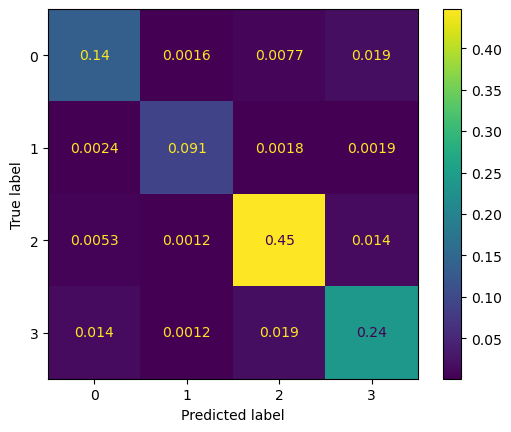

In [16]:
cm = confusion_matrix(y_test, predicted_logreg_ppl, normalize='all')

ConfusionMatrixDisplay(cm).plot()
plt.show()

In [17]:
grid = {
    'logreg_clf__C': np.logspace(-3, 3, 3),
    'logreg_clf__penalty': ['l1', 'l2']
}
grid

{'logreg_clf__C': array([1.e-03, 1.e+00, 1.e+03]),
 'logreg_clf__penalty': ['l1', 'l2']}

In [18]:
from datetime import datetime
start_time = datetime.now()
search = GridSearchCV(logreg_ppl_clf, grid, cv=10)
search.fit(X_train, y_train)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:15:38.164796


In [19]:
print('Best grid search hyperparameters are: '+str(search.best_params_))
print('Best grid search score is: '+str(search.best_score_))

Best grid search hyperparameters are: {'logreg_clf__C': 1.0, 'logreg_clf__penalty': 'l2'}
Best grid search score is: 0.9117957606479605


### Случайный лес

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
randfor_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('randfor_clf', RandomForestClassifier(random_state=42, n_jobs=-1))])

In [23]:
from datetime import datetime
start_time = datetime.now()
randfor_ppl_clf.fit(X_train, y_train)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:44:23.526443


In [24]:
from datetime import datetime
start_time = datetime.now()
predicted_randfor_ppl = randfor_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_randfor_ppl, y_test))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

                                precision    recall  f1-score   support

      Подключение коммуникаций       0.87      0.89      0.88     35843
Проектно-изыскательские работы       0.95      0.97      0.96     21505
                        Прочие       0.97      0.96      0.97    106332
  Строительно-монтажные работы       0.90      0.91      0.91     60452

                      accuracy                           0.94    224132
                     macro avg       0.92      0.93      0.93    224132
                  weighted avg       0.94      0.94      0.94    224132

Duration: 0:00:12.214546


In [25]:
metrics.accuracy_score(y_test, predicted_randfor_ppl)

0.9350962825477843

In [14]:
grid_randfor={'randfor_clf__max_depth':[3,5,10,None],
              'randfor_clf__n_estimators':[10,100,200],
              'randfor_clf__max_features':[1,3,5,7],
              'randfor_clf__min_samples_leaf':[1,2,3],
              'randfor_clf__min_samples_split':[1,2,3]
           }
grid_randfor

{'randfor_clf__max_depth': [3, 5, 10, None],
 'randfor_clf__n_estimators': [10, 100, 200],
 'randfor_clf__max_features': [1, 3, 5, 7],
 'randfor_clf__min_samples_leaf': [1, 2, 3],
 'randfor_clf__min_samples_split': [1, 2, 3]}

In [ ]:
from datetime import datetime
start_time = datetime.now()
search_randfor = GridSearchCV(randfor_ppl_clf, grid_randfor,cv=3)
search_randfor.fit(X_train, y_train)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

### Метод k ближайших соседей

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knb_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knb_clf', KNeighborsClassifier(n_neighbors=10))])

In [21]:
knb_ppl_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('knb_clf', KNeighborsClassifier(n_neighbors=10))])

In [38]:
predicted_knb_ppl = knb_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_knb_ppl, y_test))

                                precision    recall  f1-score   support

      Подключение коммуникаций       0.70      0.81      0.75     31529
Проектно-изыскательские работы       0.75      0.90      0.82     18158
                        Прочие       0.94      0.86      0.90    114768
  Строительно-монтажные работы       0.80      0.82      0.81     59677

                      accuracy                           0.84    224132
                     macro avg       0.80      0.85      0.82    224132
                  weighted avg       0.85      0.84      0.85    224132



In [39]:
metrics.accuracy_score(y_test, predicted_knb_ppl)

0.8435787839308979

Выводы:

В ходе проведения исследования была проведена классификация контрактов по группам ОКПД алгоритмами логистической регрессии, "случайного леса" и k ближайших соседей.

Для модели логистической регрессии проводился подбор оптимальных гиперпараметров с помощью GridSearchCV.

Учитывая, что мы опирались на гипотезу о правильности расстановки кодов ОКПД для определения разметки данных, а это с большой вероятностью не всегда так, необходимо уточнить информацию по разметке у заказчика и повторить исследование с правильной разметкой.

В результате лучше всего себя показал классификатор "случайный лес" с точностью  0,94.